### <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

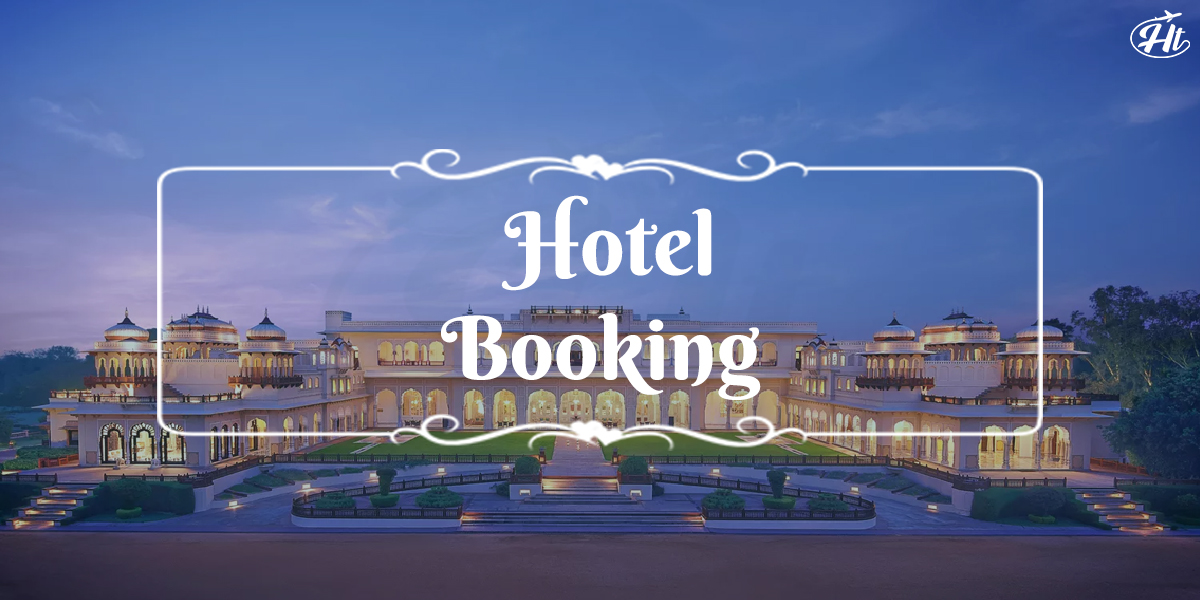

## **Loading the data**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
from datetime import date
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/eda_capston/Hotel Bookings.csv')


# **Understanding the data**

In [ ]:
df.head().T

,0,1,2,3,4
hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel
is_canceled,0,0,0,0,0
lead_time,342,737,7,13,14
arrival_date_year,2015,2015,2015,2015,2015
arrival_date_month,July,July,July,July,July
arrival_date_week_number,27,27,27,27,27
arrival_date_day_of_month,1,1,1,1,1
stays_in_weekend_nights,0,0,0,0,0
stays_in_week_nights,0,0,1,1,2
adults,2,2,1,1,2


In [ ]:
df.shape

(119390, 32)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [ ]:
df.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

# Here we have  alot of NaN values in company and agent column which highly impact our further analysis of data and will remove the 2 columns.so removing column will better idea.

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
df.size

3820480

In [ ]:
df.shape

(119390, 32)

In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

## **Cleaning the Data**

> by dropping values which didnt seem relevant for our study.

*  arrival_date_week_number,company and agent

In [ ]:
df.drop(['arrival_date_week_number','company','agent'], axis=1, inplace=True)

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,1,0,0,2,0.0,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,1,0,0,2,0.0,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,1,0,1,1,0.0,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,1,0,1,1,0.0,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,1,0,2,2,0.0,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


# Cancellation Concepts based on following details


> Getting the total number of guests in one column.



In [ ]:
df.isna().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car_parking_spaces         0
total_of_spe

# To further clean the data if the numerical value in a column is null and if the count of the null is nominal we can upload it to the medina value.
Here the null count of children is just 4 out of 1lakh plus records. hence the method

In [ ]:
df['children'].median()

0.0

In [ ]:
df['children'].fillna(df['children'].median(), inplace=True)

In [ ]:
df.isna().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            0
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car_parking_spaces         0
total_of_spe

Further clean up of data. if a nominal count of string data is null then fill it by using the mode.Here the Null values of country is less than .5% so we can add the mode to null values

In [ ]:
df['kids']=df['babies'] + df['children']

In [ ]:
df['country'].mode()

0    PRT
dtype: object

In [ ]:
df.loc[df['country'] == 'PRT', 'country'].count()

48590

In [ ]:
df['country'].fillna(df['country'].mode()[0], inplace=True)


In [ ]:
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

**DATA IS NOW CLEAN!!!!!**

Exploratory data analysis
Now we will start the analysis of our data
Firstly we will study the values which will affect th bookings done on the hotel.

# **Bookings based on the hotel type**

In [ ]:
df['hotel'].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [ ]:
df['reservation_status_date'].count()

119390

In [ ]:
hotel_date=df.groupby('hotel')['reservation_status_date'].value_counts()
hotel_date

hotel         reservation_status_date
City Hotel    2015-10-21                 1416
              2015-07-06                  763
              2015-01-01                  760
              2016-11-25                  746
              2016-01-18                  553
                                         ... 
Resort Hotel  2015-05-15                    1
              2015-05-30                    1
              2015-06-14                    1
              2015-06-20                    1
              2017-09-12                    1
Name: reservation_status_date, Length: 1777, dtype: int64

# **Histogram to show the distribution of data throughout the values**

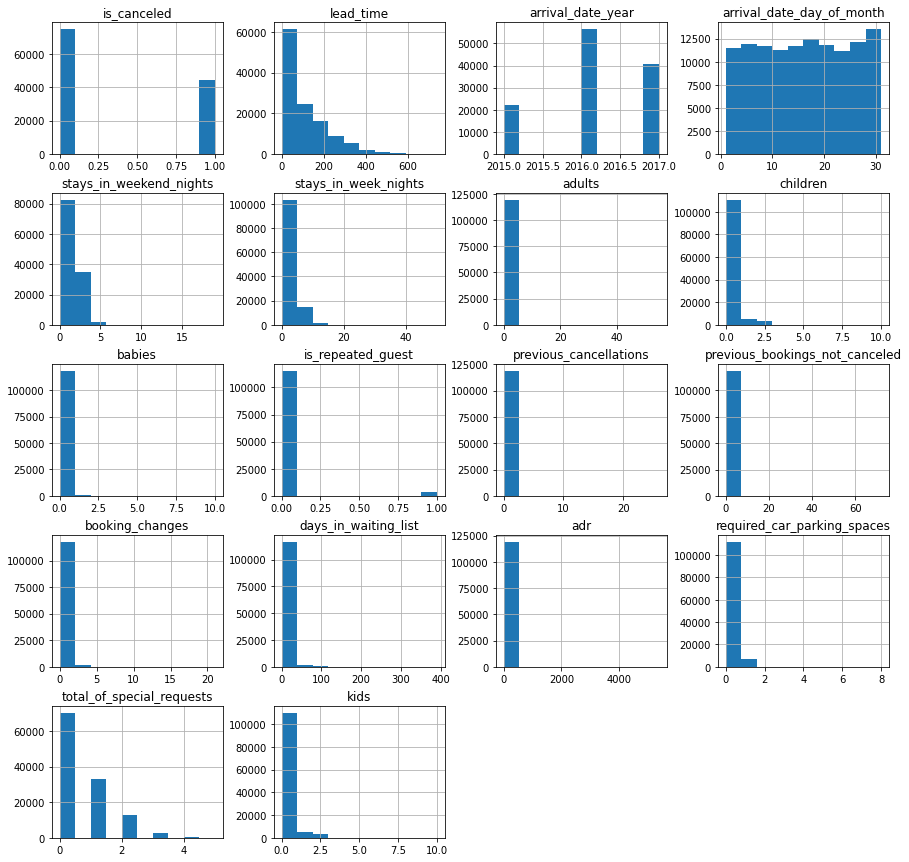

In [ ]:
df.hist(figsize=(15,15))
plt.show()

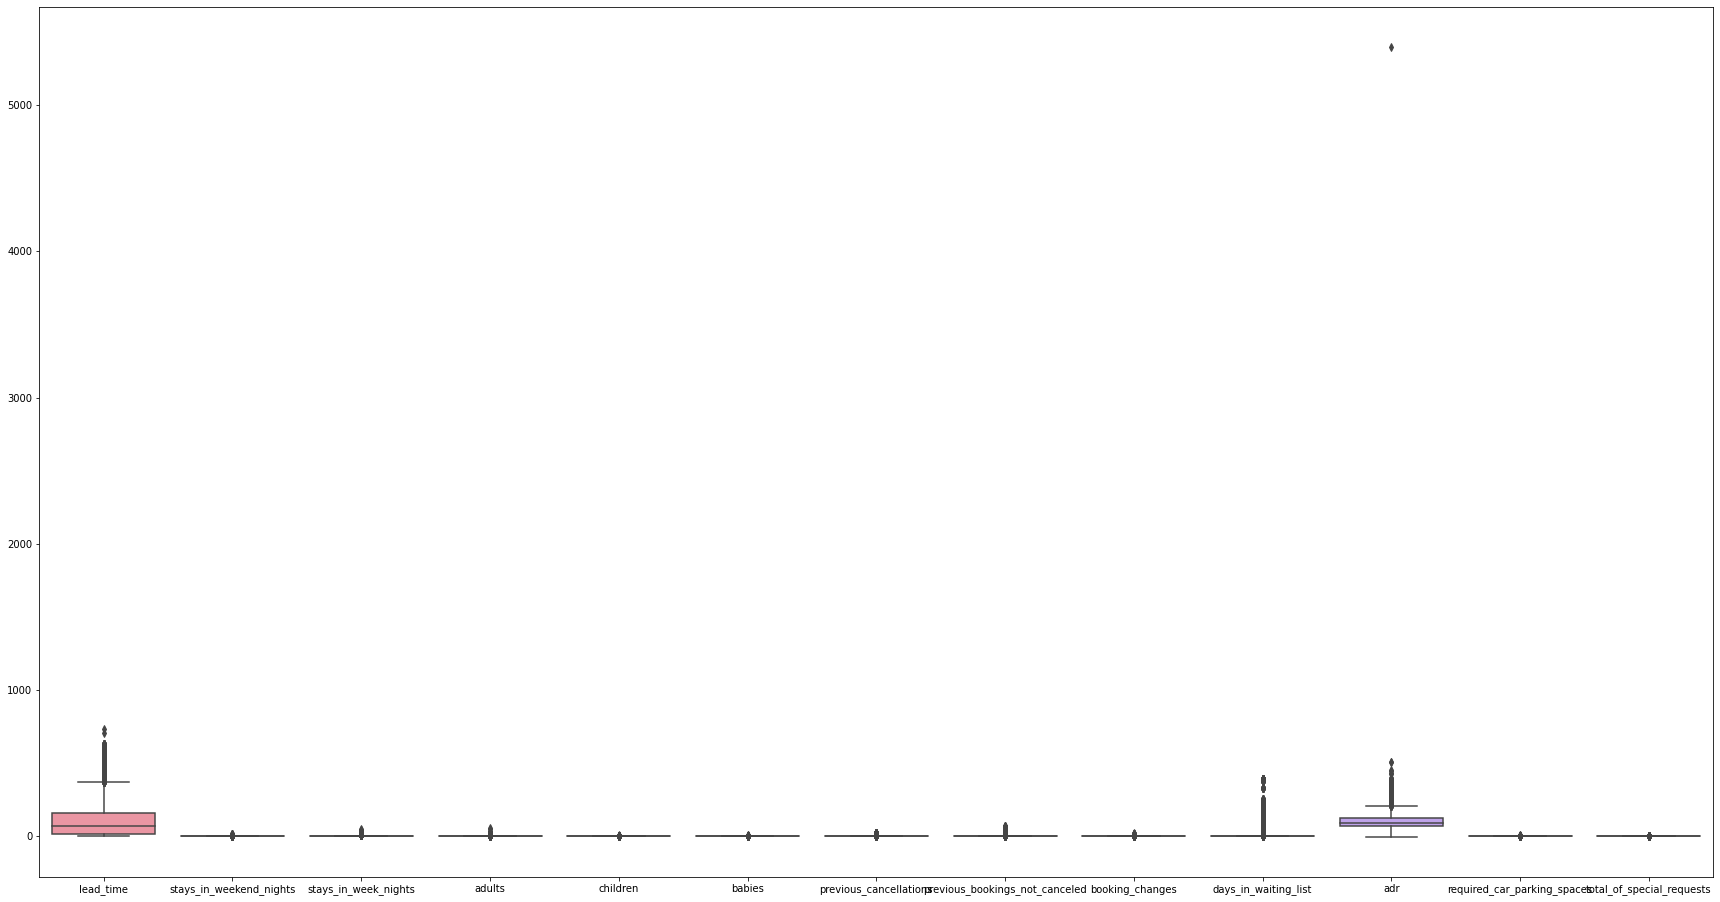

In [ ]:
plt.figure(figsize=(30,16))
sns.boxplot(data=df[['lead_time','stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']])
plt.show()

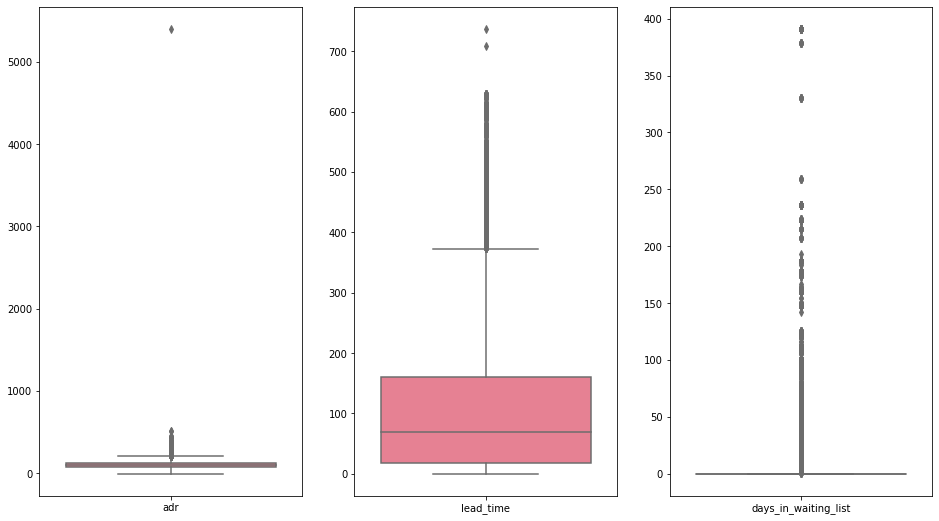

In [ ]:
fig, axes=plt.subplots(1,3, figsize=(16,9))
sns.set_palette('husl')
ax= sns.boxplot(data=df[['adr']], ax=axes[0])
ax=sns.boxplot(data=df[['lead_time']], ax=axes[1])
ax= sns.boxplot(data=df[['days_in_waiting_list']], ax=axes[2])
plt.show()

colomn adr has very high outlier value along with many other columns too i.e.  lead time & days in waiting list

#**Handling outliers**

In [ ]:
# First Removing outliers by defining threshold based on common understanding
new_df = df.copy()

new_df.loc[new_df.stays_in_weekend_nights > 5,'stays_in_weekend_nights'] = 5
new_df.loc[new_df.stays_in_week_nights > 10,'stays_in_week_nights'] = 10
new_df.loc[new_df.adults > 4,'adults'] = 4
new_df.loc[new_df.children > 3,'children'] = 3
new_df.loc[new_df.babies > 3,'babies'] = 3
new_df.loc[new_df.kids > 3,'kids'] = 3
new_df.loc[new_df.required_car_parking_spaces > 3,'required_car_parking_spaces'] = 3
new_df.loc[new_df.previous_cancellations > 0,'previous_cancellations'] = 1
new_df.loc[new_df.previous_bookings_not_canceled > 0,'previous_bookings_not_canceled'] = 1
new_df.loc[new_df.booking_changes > 5,'booking_changes'] = 5

In [ ]:
# Removing outliers by standard methods and Plotting graphs:
for col in ['lead_time']:
  # Using IQR method and capping to define the range of inliners:
  lower_cap, q1, q3, upper_cap, median = df[col].quantile([0.01,0.25,0.75,0.99,0.5])
  lower_limit = q1 - 1.5*(q3-q1)
  upper_limit = q3 + 1.5*(q3-q1)

  # Replacing Outliers with median value and Capping
  new_df[col] = np.where(new_df[col] > upper_limit, median,np.where(
                         new_df[col] < lower_limit,median,np.where(
                         new_df[col] < lower_cap,lower_cap,np.where(
                         new_df[col] > upper_cap,upper_cap,new_df[col]))))

In [ ]:
new_df['total_stays']=new_df['stays_in_week_nights']+new_df['stays_in_weekend_nights']

In [ ]:
new_df['guest']= new_df['adults']+new_df['children']+new_df['babies']
new_df['guest'] = new_df.guest.map( lambda x: 'Single' if x == 1 else 'Family')
new_df['kids_count'] = new_df.kids.map( lambda x: 'no_kids' if x == 0 else 'kids')

In [ ]:
# Removing outliers
new_df.drop(new_df[new_df['adr'] > 5000].index, inplace = True)
# Removing adult count=0 as it is not relevent for our study
new_df.drop(new_df[new_df['adults'] == 0].index, inplace = True)
# Removing total stays=0 as it is not relevent for our study
new_df.drop(new_df[new_df['total_stays'] == 0].index, inplace = True)
# Removing assigned room type=0 as it is not relevent for our study
new_df.drop(new_df[new_df['assigned_room_type'] == 0].index, inplace = True)

In [ ]:
# Some columns have numeric values but those are actually categorical
categorical_features=["hotel","arrival_date_month","meal","country","market_segment","is_canceled",
                      "distribution_channel","reserved_room_type","assigned_room_type","deposit_type",
                      "customer_type","reservation_status","is_repeated_guest",'same_room','reservation_status_date',
                      'arrival_date_year','arrival_date_day_of_month','agent','company']

numeric_features = [i for i in df.columns if i not in categorical_features]
print(numeric_features)

['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'kids']


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

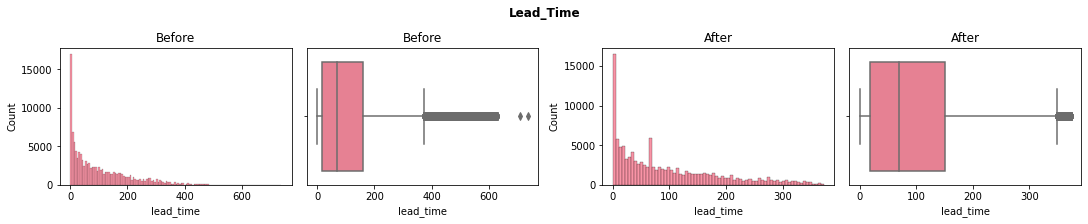

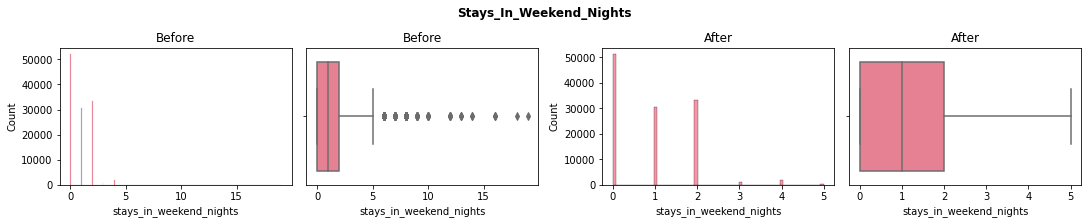

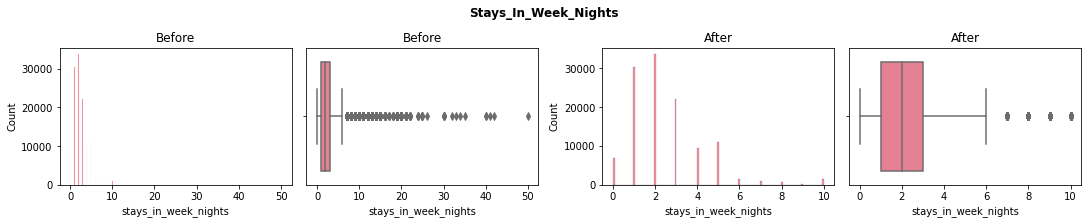

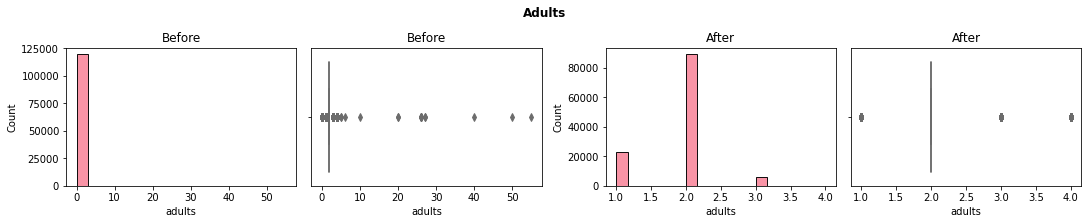

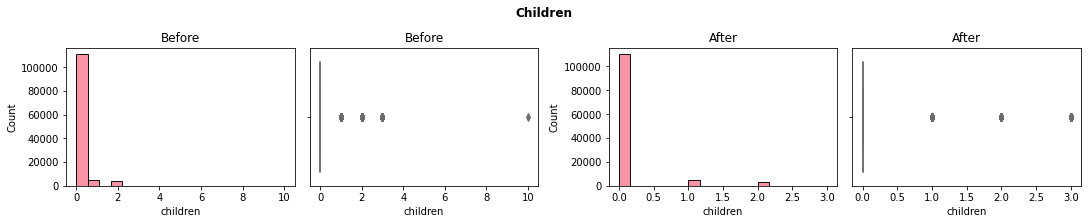

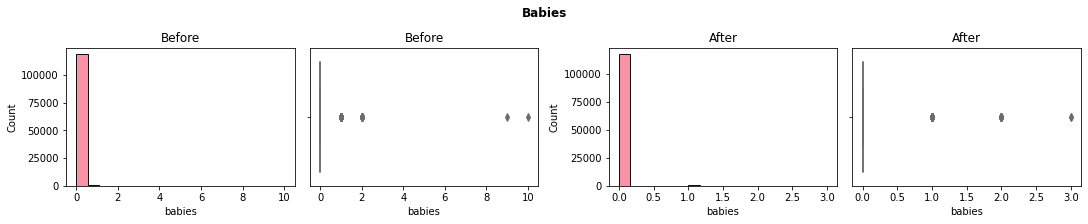

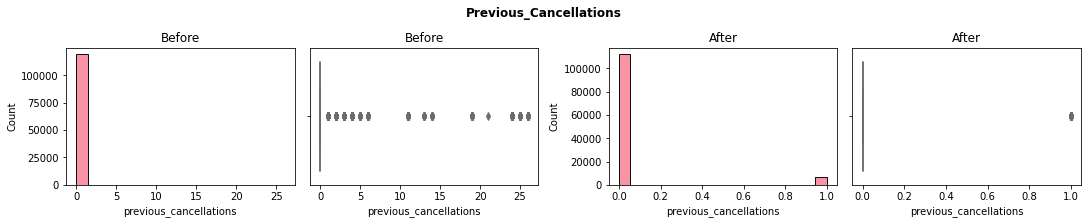

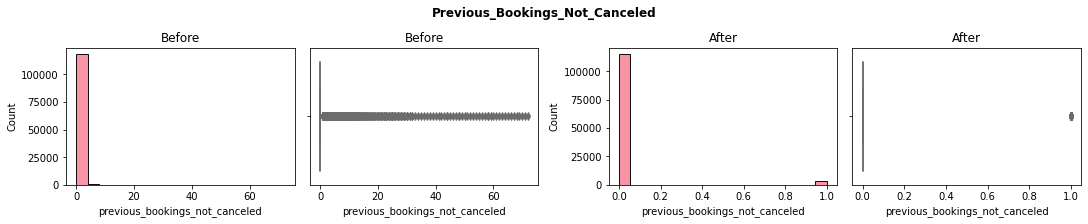

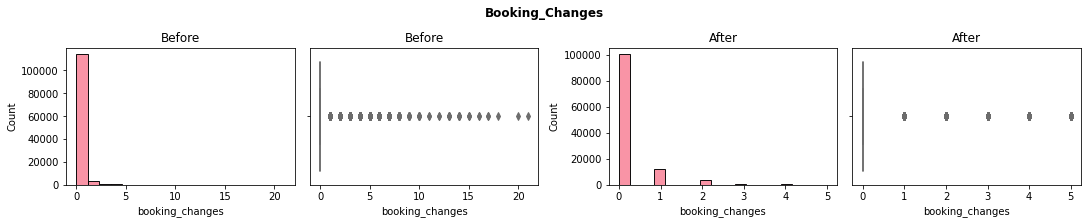

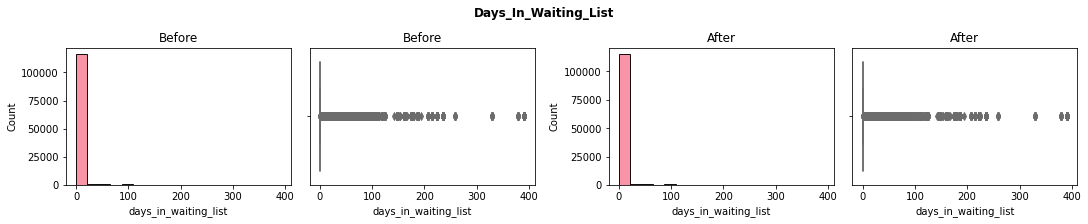

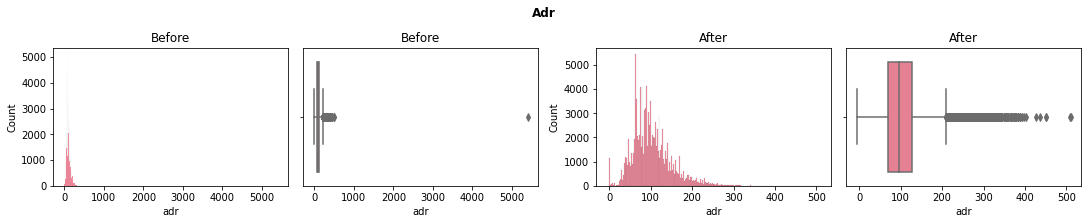

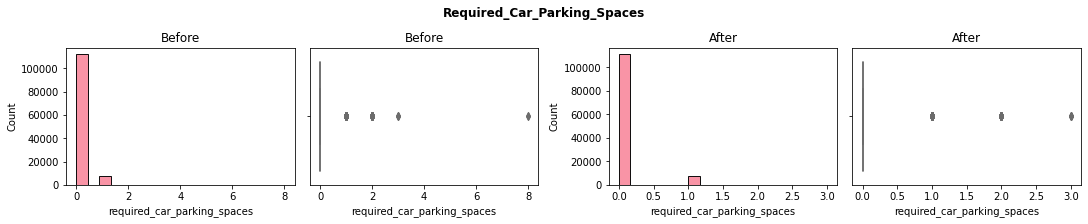

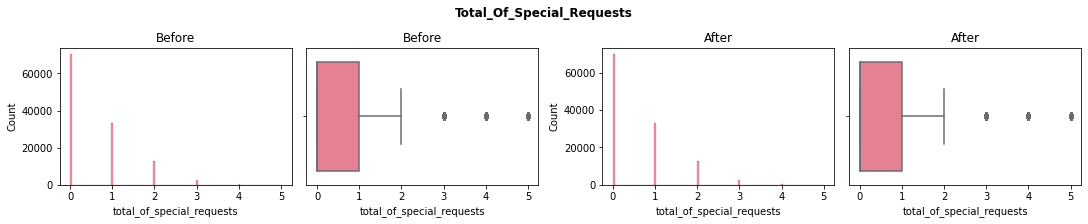

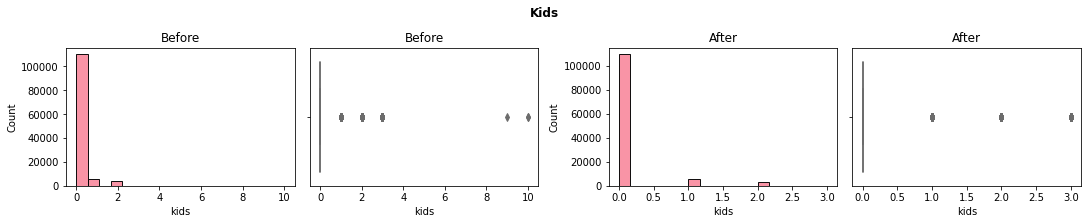

In [ ]:
#Plotting Graphs Before treating outliers 
for col in numeric_features:
  fig, ax =plt.subplots(1,4, constrained_layout=True)
  fig.set_size_inches(15, 3)
  sns.histplot(df[col], ax=ax[0]).set(title="Before")
  sns.boxplot(df[col], ax=ax[1]).set(title="Before")

# After treating outliers
  sns.histplot(new_df[col], ax=ax[2]).set(title="After")
  sns.boxplot(new_df[col], ax=ax[3]).set(title="After")
  plt.suptitle(f'{col.title()}',weight='bold')
  fig.show()

## **Reservations in different Hotel Type**

Text(0.5, 1.0, '% share of different hotel type ')

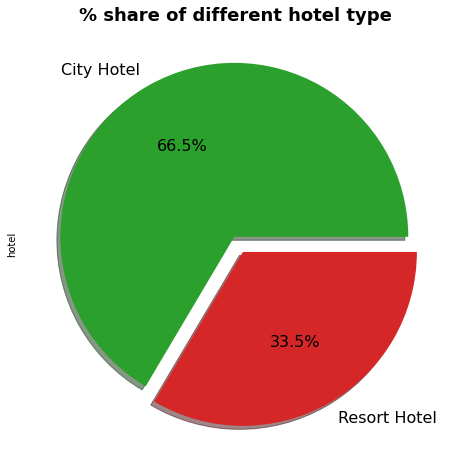

In [ ]:
# Visualizing the by pie chart.

ax = new_df['hotel'].value_counts().plot.pie(explode=[0.05, 0.05], autopct='%1.1f%%', shadow=True, figsize=(10,8),fontsize=16, colors=['tab:green', 'tab:red'])   
ax.set_title('% share of different hotel type ',fontsize = 18, fontweight='bold')

### City Hotels are most preferred hotel by guests. Thus city hotels has maximum bookings.

### **Comparative analysis of reservations and revenue of hotels**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


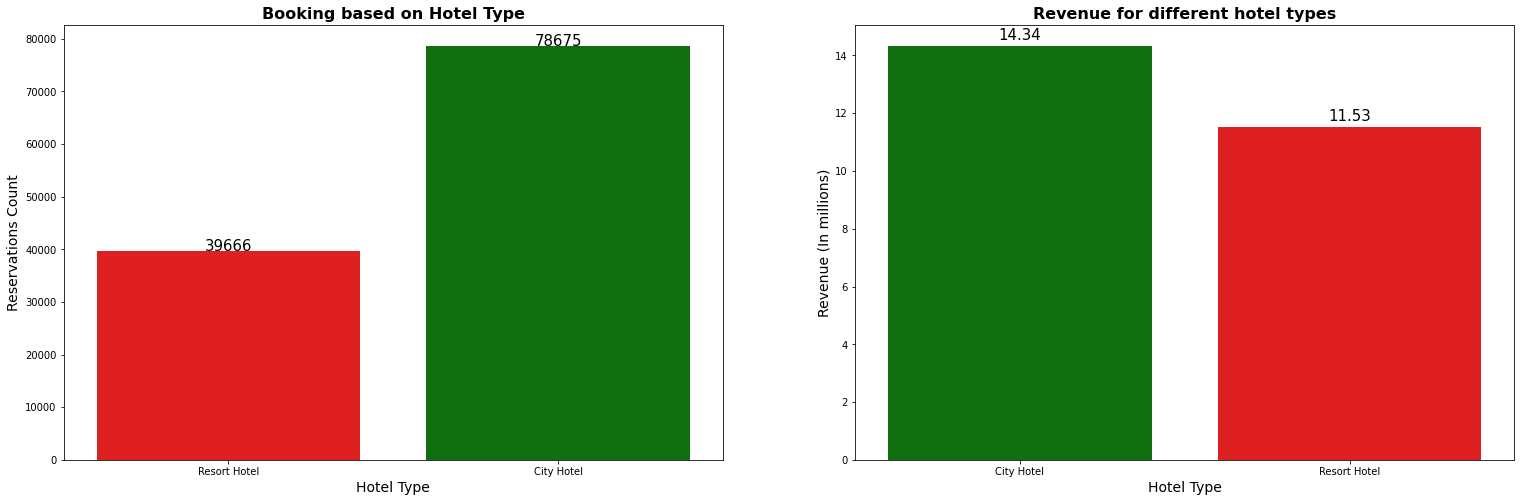

In [ ]:
# set lables
fig, axes = plt.subplots(1,2, figsize=(26, 8))

# This graph shows the reservations made in both type of hotels- 'Resort Hotel','City Hotel'.
ax = sns.countplot(ax=axes[0], data=new_df, x='hotel',palette=['red', 'green'])
ax.set_title('Booking based on Hotel Type',fontsize = 16, fontweight='bold' )
ax.set_xlabel('Hotel Type', fontsize = 14)
ax.set_ylabel('Reservations Count', fontsize = 14)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.40,rect.get_height(),horizontalalignment='center', fontsize = 15)

#This graph shows price distribution for hotel type
actual_guests = new_df.loc[new_df["is_canceled"] == 0]
actual_guests['revenue'] = (actual_guests['adr'] * (actual_guests['stays_in_weekend_nights'] + actual_guests['stays_in_week_nights']))/1000000
revenue_hotel=actual_guests.groupby('hotel')['revenue'].sum().reset_index().round(2)
ax = sns.barplot(ax=axes[1], x='hotel', y='revenue', data=revenue_hotel,palette=['green', 'red'])
ax.set_title('Revenue for different hotel types',fontsize = 16, fontweight='bold' )
ax.set_xlabel('Hotel Type',fontsize = 14)
ax.set_ylabel('Revenue (In millions)',fontsize = 14)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.20,rect.get_height(),horizontalalignment='center', fontsize = 15)

### City Hotels are most preferred hotel by guests. Since the bookings are double for City hotel but the revenue difference is not much in between them.
### This shows that Resort hotels are bit expensive as compared to City hotels.


### **Top 10 countries with maximum booking**

In [ ]:
# Top 10 countries with highest count of hotel.
top10_country = df[['hotel','country']].value_counts().head(10).reset_index().rename(columns={0:'count'})

### We have a huge number of visitors in western Europe namely  Portugal,France, UK.

### **ADR of hotels in each month**

Text(0, 0.5, 'ADR')

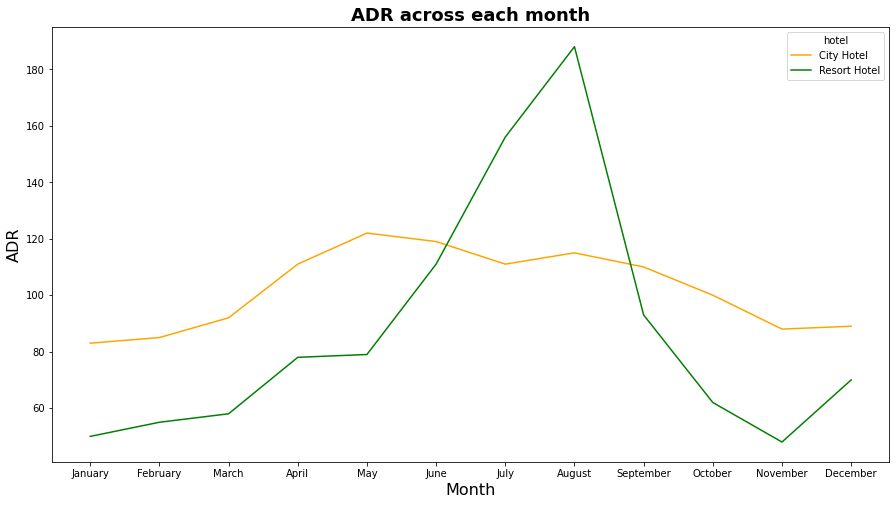

In [ ]:
bookings_by_months_df=new_df.groupby(['arrival_date_month','hotel'])['adr'].mean().astype(int).reset_index()
months = ['January', 'February','March','April','May','June','July','August','September','October','November','December']
#df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'],categories=months,ordered=True)
# it will take the order of the month list in the df along with values
bookings_by_months_df['arrival_date_month']=pd.Categorical(bookings_by_months_df['arrival_date_month'],categories=months,ordered=True)
#sorting
bookings_by_months_df=bookings_by_months_df.sort_values('arrival_date_month')
# set plot size and plot the line
plt.figure(figsize=(15,8))
ax= sns.lineplot(x=bookings_by_months_df['arrival_date_month'],y=bookings_by_months_df['adr'],hue=bookings_by_months_df['hotel'],palette=['orange', 'green'])
#sns.set_palette("husl")

# set lables
ax.set_title('ADR across each month',fontsize = 18, fontweight='bold')
ax.set_xlabel('Month',fontsize = 16)
ax.set_ylabel('ADR',fontsize = 16)

### For Resort hotel-- ADR is increasing between April to September and then started falling down, so best time to book a resort hotel  is  from October to March as we are getting lower ADR.
### For City hotel--City hotels have nearly constant ADR from April to October and after that ADR start decreasing, so the best time to book a City hotel is from November to March.

### **Revenue generated by hotels in each month**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


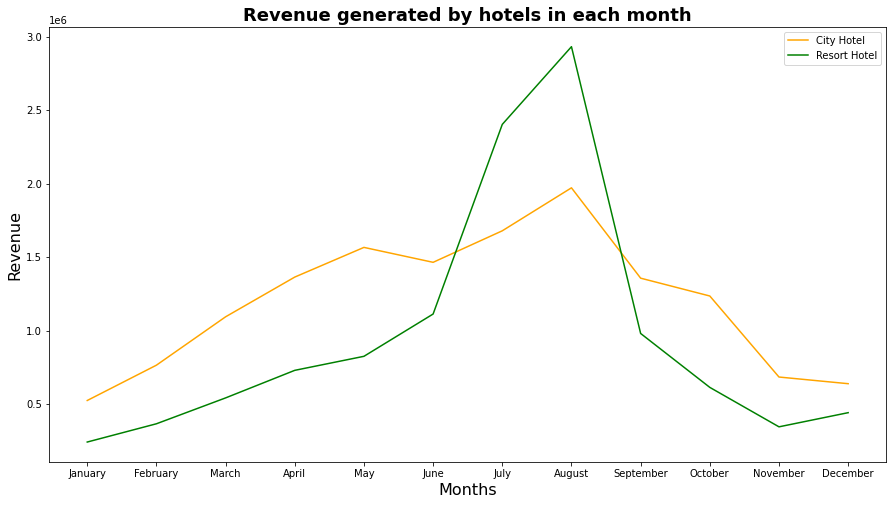

In [ ]:
# Resizing plot 
plt.figure(figsize=(15,8))

actual_guests = new_df.loc[new_df["is_canceled"] == 0]
actual_guests['revenue'] = actual_guests['adr'] * (actual_guests['stays_in_weekend_nights'] + actual_guests['stays_in_week_nights'])
revenue_df=actual_guests.groupby(['hotel','arrival_date_month'])['revenue'].sum().reset_index()

months = ['January', 'February','March','April','May','June','July','August','September','October','November','December']
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'],categories=months,ordered=True)
# it will take the order of the month list in the df along with values
revenue_df['arrival_date_month']=pd.Categorical(revenue_df['arrival_date_month'],categories=months,ordered=True)
#sorting
revenue_df=revenue_df.sort_values('arrival_date_month')

ax =sns.lineplot(data = revenue_df, x = 'arrival_date_month', y = 'revenue', hue = 'hotel',palette=['orange', 'green'])
ax.set_title('Revenue generated by hotels in each month',fontsize = 18, fontweight='bold')
ax.set_xlabel('Months',fontsize = 16)
ax.set_ylabel('Revenue',fontsize = 16)
plt.legend(loc='upper right')

### Resort hotels and City hotels both are getting higher revenue between June to September.

### **Comparative study of reservation based on lead time and price of hotel in each month**

In [ ]:
new_df_lead=new_df.groupby(['arrival_date_month','hotel'])['lead_time'].mean().astype(int).reset_index()
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
# It will take the order of the month list in the df along with values
new_df_lead['arrival_date_month']=pd.Categorical(new_df_lead['arrival_date_month'],categories=months,ordered=True)
new_df['arrival_date_month']=pd.Categorical(new_df['arrival_date_month'],categories=months,ordered=True)
#sorting
new_df_lead=new_df_lead.sort_values('arrival_date_month')

Text(0, 0.5, 'Booking count')

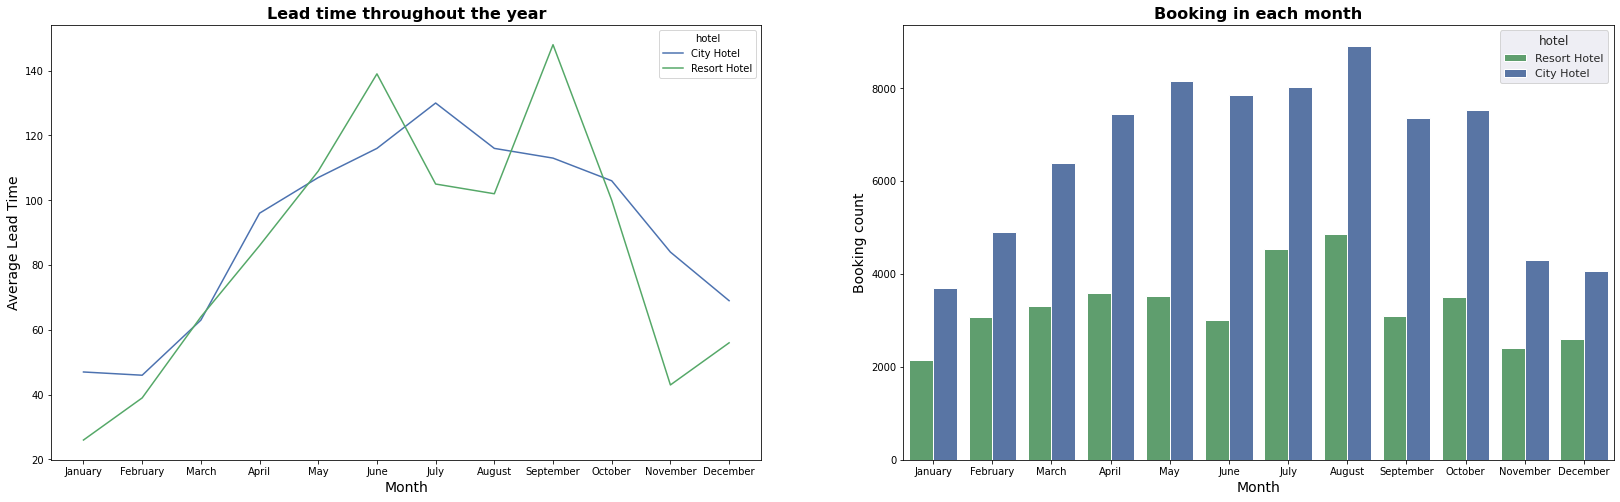

In [ ]:
# set lables
fig, axes = plt.subplots(1,2, figsize=(28, 8))

ax = sns.lineplot(ax=axes[0], data=new_df_lead, x=new_df_lead['arrival_date_month'], y=new_df_lead['lead_time'],hue=new_df_lead['hotel'],palette=['b','g'])
sns.set(rc={'figure.figsize':(16,8)})
ax.set_title('Lead time throughout the year',fontsize = 16, fontweight='bold')
ax.set_xlabel('Month', fontsize = 14)
ax.set_ylabel('Average Lead Time', fontsize = 14)

ax = sns.countplot(ax=axes[1], data=new_df, x=new_df['arrival_date_month'], hue=new_df['hotel'],palette=['g','b'])
sns.set(rc={'figure.figsize':(16,8)})
ax.set_title('Booking in each month',fontsize = 16, fontweight='bold')
ax.set_xlabel('Month',fontsize = 14)
ax.set_ylabel('Booking count',fontsize = 14)

### From the above graph it can be concluded that majority of people prefer to travel in summers(April to September) and maximum avg. lead time is also seen between April to September hence trends shows that people usually book hotel before 30-60 days earlier.

### **Reservations Made in each Year**

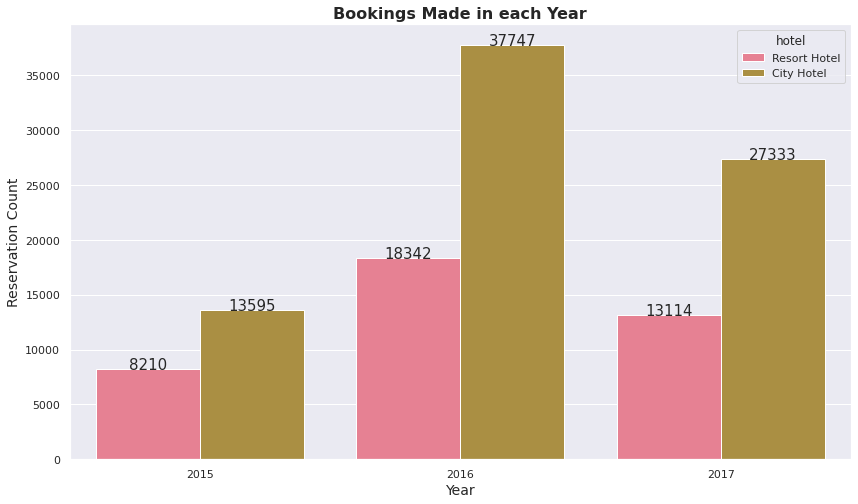

In [ ]:
# This graph shows the booking made in each month for different hotel types.
sns.set(rc={'figure.figsize':(14,8)})
sns.set_palette("husl")
ax = sns.countplot(x = 'arrival_date_year',hue='hotel', data=new_df)
ax.set_title('Bookings Made in each Year',fontsize = 16, fontweight='bold')
ax.set_xlabel('Year',fontsize = 14)
ax.set_ylabel('Reservation Count',fontsize = 14)
for rect in ax.patches:
   ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.20,rect.get_height(),horizontalalignment='center', fontsize = 15)

### It seems that 2016 to be year where the hotel bookings are highest.

### **Optimal stay**

In [ ]:
new_df['total_stays']= new_df['stays_in_weekend_nights']+new_df['stays_in_week_nights']

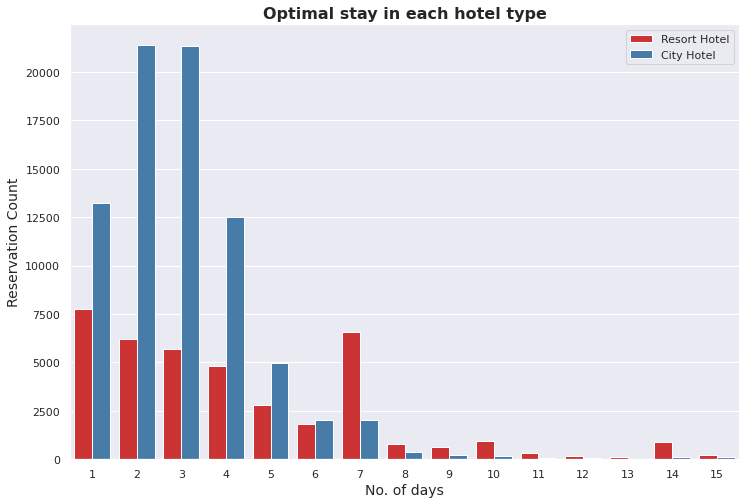

In [ ]:
# This graph shows No. of total stays in each hotel type.
sns.set(rc={'figure.figsize':(12,8)})
sns.set_palette("Set1")
ax = sns.countplot(x ='total_stays',hue='hotel', data=new_df)
ax.set_title('Optimal stay in each hotel type',fontsize = 16, fontweight='bold')
ax.set_xlabel('No. of days',fontsize = 14)
ax.set_ylabel('Reservation Count',fontsize = 14)
plt.legend(loc='upper right')

### It can be stated that generally people prefer City hotels for shorter stay and Resort Hotels for longer stay. Most common stay length is less than 4 days.

### **Booking made by different Distribution channel**

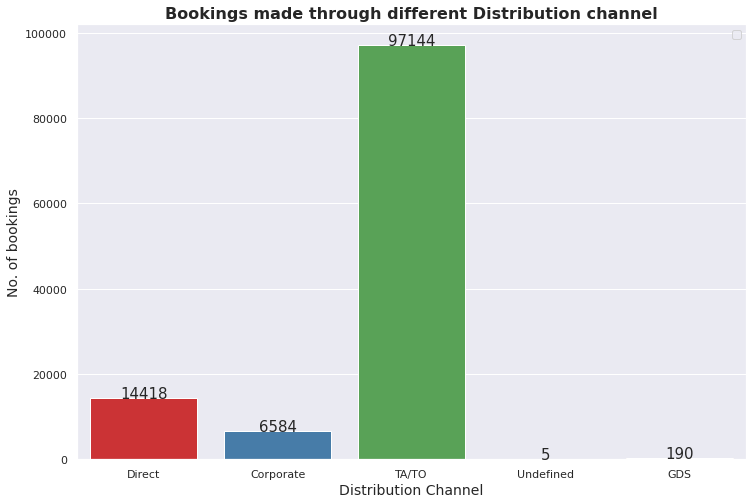

In [ ]:
# This graph shows reservations made by different distribution channel.
sns.set(rc={'figure.figsize':(12,8)})
sns.set_palette("Set1")
ax = sns.countplot(x='distribution_channel', data=new_df)
ax.set_title('Bookings made through different Distribution channel',fontsize = 16, fontweight='bold')
ax.set_xlabel('Distribution Channel',fontsize = 14)
ax.set_ylabel('No. of bookings',fontsize = 14)
plt.legend(loc='upper right')
for rect in ax.patches:
   ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.20,rect.get_height(),horizontalalignment='center', fontsize = 15)

### Majority of the bookings are done by Travel agencies(Online/Offline) and Tour Operators for both hotel types.

###**Market share of customer type**

Text(0.5, 1.0, 'Market share of customer type')

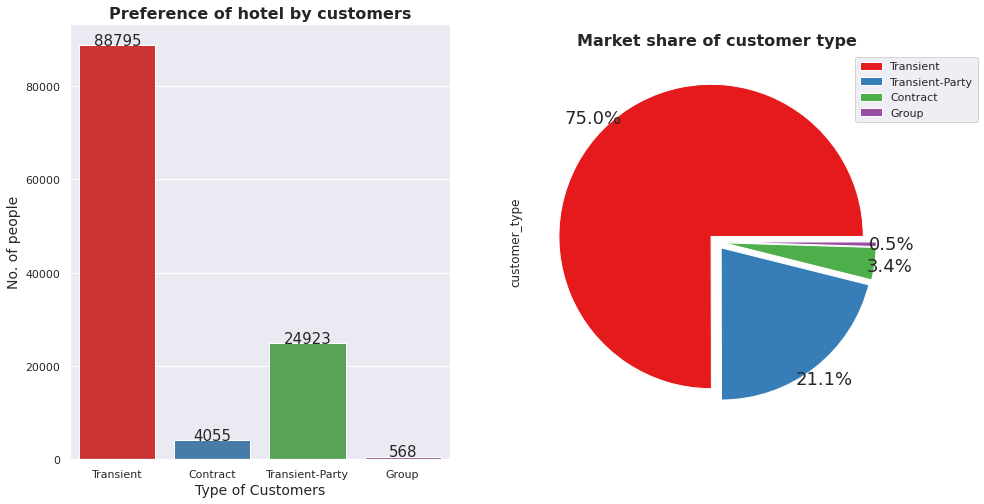

In [ ]:
# set lables
fig, axes = plt.subplots(1,2, figsize=(26, 8))

sns.set(rc={'figure.figsize':(10,8)})
sns.set_palette("Set1")
ax = sns.countplot(ax=axes[0],x='customer_type', data=new_df)
ax.set_title('Preference of hotel by customers',fontsize = 16, fontweight='bold')
ax.set_xlabel('Type of Customers',fontsize = 14)
ax.set_ylabel('No. of people',fontsize = 14)
for rect in ax.patches:
   ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.20,rect.get_height(),horizontalalignment='center', fontsize = 15)

ax=axes[1],new_df['customer_type'].value_counts().plot.pie(explode=[0.05]*4, autopct='%1.1f%%', figsize=(15,8),fontsize=18,pctdistance=1.1,labeldistance=1.3,labels=None)
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=df['customer_type'].value_counts().index.tolist())
plt.title('Market share of customer type',fontsize = 16, fontweight='bold')


### **Preferred Room type**

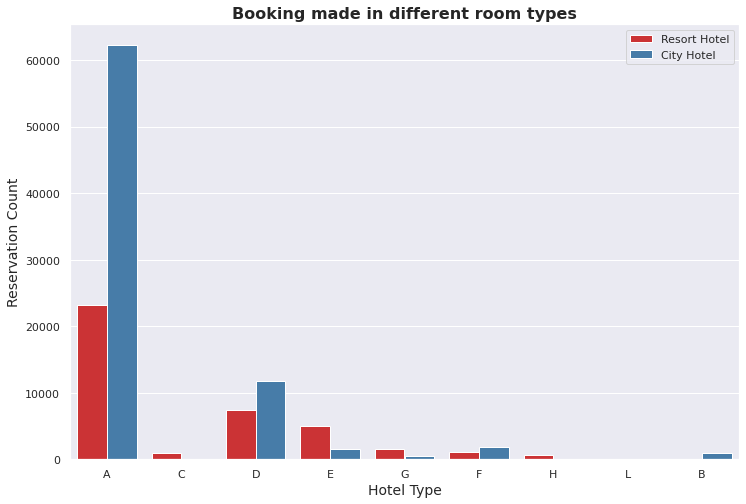

In [ ]:
# The graph shows reservation made on different room types
sns.set(rc={'figure.figsize':(12,8)})
sns.set_palette("Set1")
graph = sns.countplot(hue=new_df['hotel'],x=new_df['reserved_room_type'])
graph.set_title('Booking made in different room types',fontsize = 16, fontweight='bold')
graph.set_xlabel('Hotel Type',fontsize = 14)
graph.set_ylabel('Reservation Count',fontsize = 14)
plt.legend(loc='upper right')

####**Booking made in different room types based on ADR**

In [62]:
room_price=new_df.groupby(['reserved_room_type','hotel'])['adr'].mean().astype(int).reset_index().head(10)
room_price= room_price.sort_values(by='adr',ascending=True)

Text(0, 0.5, 'ADR')

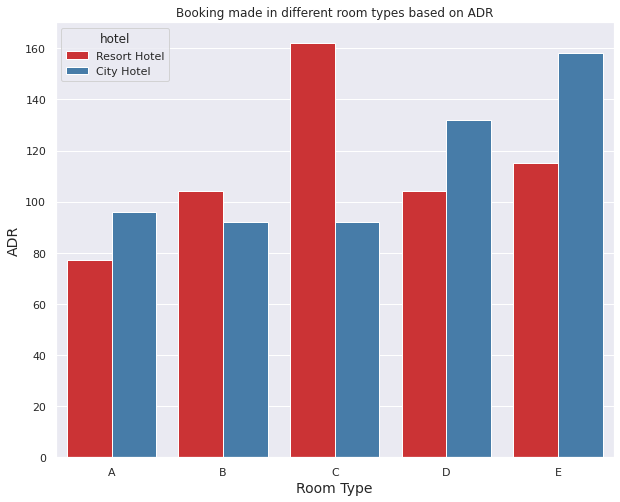

In [ ]:
sns.set(rc={'figure.figsize':(10,8)})
sns.set_palette("Set1")
graph = sns.barplot(x='reserved_room_type', y='adr', hue='hotel',data=room_price)
graph.set(title='Booking made in different room types based on ADR')
graph.set_xlabel('Room Type',fontsize = 14)
graph.set_ylabel('ADR',fontsize = 14)

### Majority of people prefers room type-A seems to be more economical for booking.


### **Relation between ADR and Lead time**

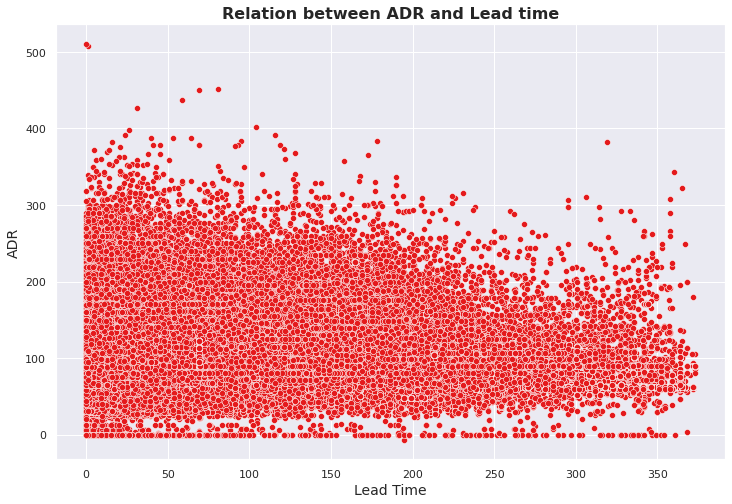

In [ ]:
#This graph shows relation between ADR and lead time
graph = sns.scatterplot(data = new_df, x = 'lead_time', y = 'adr')
graph.set_title('Relation between ADR and Lead time',fontsize = 16, fontweight='bold')
graph.set_xlabel('Lead Time',fontsize = 14)
graph.set_ylabel('ADR',fontsize = 14)
plt.show()

### Here we can see that as lead time increases the ADR decreases. This means if a customer  book in advance, he can get a better deal.

### **Analysis of bookings based on deposit type**

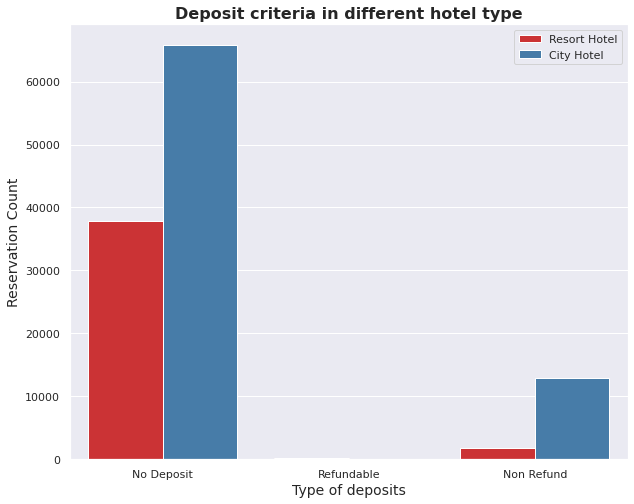

In [ ]:
# This graph shows Deposit type in different hotel type.
sns.set(rc={'figure.figsize':(10,8)})
sns.set_palette("Set1")
graph = sns.countplot(hue=new_df['hotel'],x=new_df['deposit_type'])
graph.set_title('Deposit criteria in different hotel type',fontsize = 16, fontweight='bold')
graph.set_xlabel('Type of deposits',fontsize = 14)
graph.set_ylabel('Reservation Count',fontsize = 14)
plt.legend(loc='upper right')

###Mostly deposits are not asked at time of booking in both the hotel types.

### **Hotel price distribution**

Text(0, 0.5, 'Avg Daily Price')

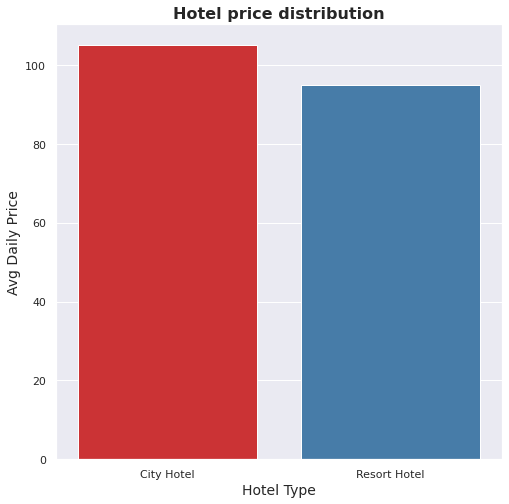

In [ ]:
hotel_price = new_df.groupby('hotel')['adr'].mean().astype(int).reset_index()

sns.set(rc={'figure.figsize':(8,8)})
sns.set_palette("Set1")
graph = sns.barplot(x='hotel',y='adr', data=hotel_price)
graph.set_title('Hotel price distribution',fontsize = 16, fontweight='bold')
graph.set_xlabel('Hotel Type',fontsize = 14)
graph.set_ylabel('Avg Daily Price',fontsize = 14)

### By this graph we can see that ADR of City Hotels is higher(aprrox value of 100) than ADR of the Resort Hotels(approx 80).

## **Cancellations in different Hotel Type**

### **Cancellations made in each Year**

In [ ]:
# Using .loc() property for single condition.
new_df.loc[(new_df['is_canceled']==1), 'is_canceled'] = "Cancellation"

In [ ]:
cancellation = new_df.loc[new_df["is_canceled"] =='Cancellation']

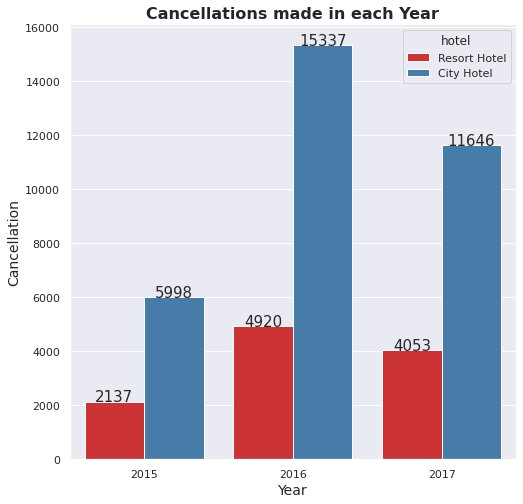

In [ ]:
ax = sns.countplot(x ='arrival_date_year',hue='hotel',data=cancellation)
sns.set(rc={'figure.figsize':(14,8)})
sns.set_palette("husl")
ax.set_title('Cancellations made in each Year',fontsize = 16, fontweight='bold')
ax.set_xlabel('Year',fontsize = 14)
ax.set_ylabel('Cancellation',fontsize = 14)
for rect in ax.patches:
   ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.20,rect.get_height(),horizontalalignment='center', fontsize = 15)

We can see lesser cancellations were done in the year 2016 in City hotel.


## **Cancellation made in each hotel type**

Text(0.5, 1.0, '% of cancellations made in each Hotel Type')

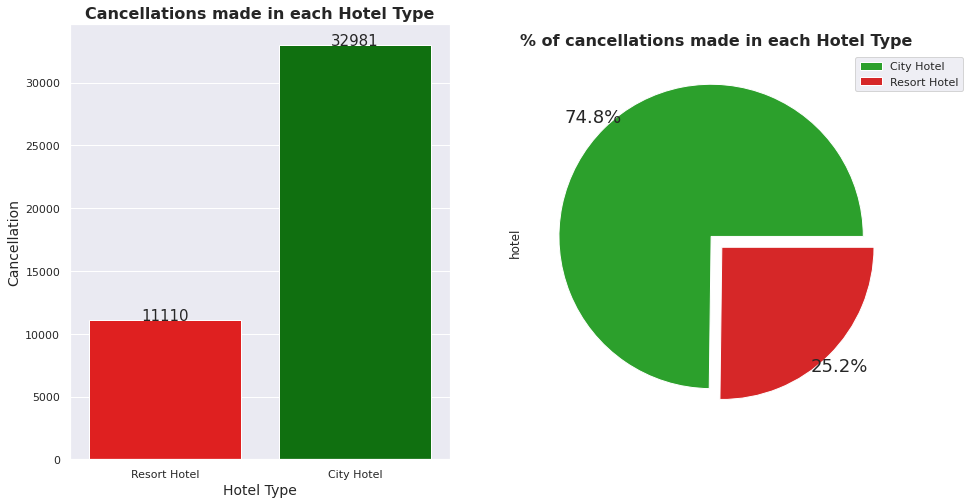

In [ ]:
# set lables
fig, axes = plt.subplots(1,2, figsize=(26, 8))

# This graph shows cancellations made in different hotel types.
ax = sns.countplot(ax=axes[0],x ='hotel', data=cancellation, palette=['red', 'green'])
sns.set(rc={'figure.figsize':(12,8)})
ax.set_title('Cancellations made in each Hotel Type',fontsize = 16, fontweight='bold')
ax.set_xlabel('Hotel Type',fontsize = 14)
ax.set_ylabel('Cancellation',fontsize = 14)
for rect in ax.patches:
   ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.20,rect.get_height(),horizontalalignment='center', fontsize = 15)

ax=axes[1],cancellation['hotel'].value_counts().plot.pie(explode=[0.05]*2, autopct='%1.1f%%', figsize=(15,8),fontsize=18,pctdistance=1.1,labeldistance=1.3,labels=None,colors=['tab:green','tab:red'])
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=df['hotel'].value_counts().index.tolist())
plt.title('% of cancellations made in each Hotel Type',fontsize = 16, fontweight='bold')

### Cancellation is more in City hotels as compared to Resort hotels

### **Cancellations made in each months**

Text(0, 0.5, 'Cancellation')

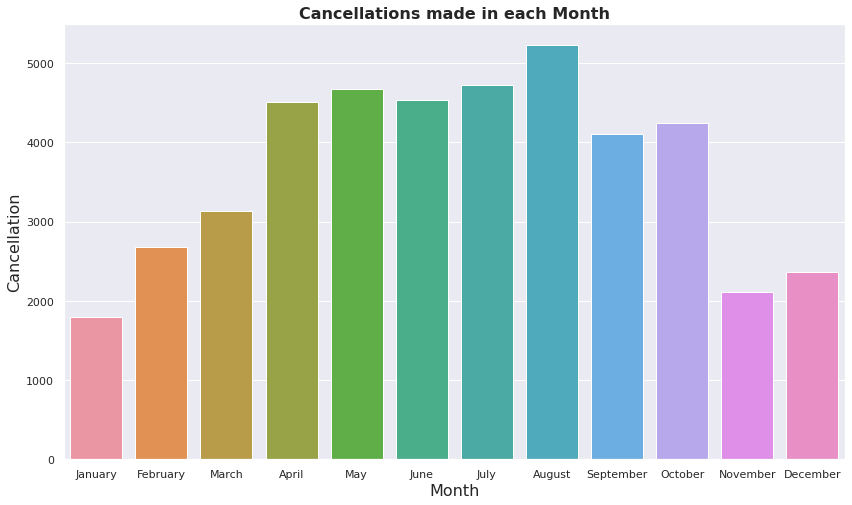

In [ ]:
# This graph shows cancellations made in each month
sns.set(rc={'figure.figsize':(14,8)})
graph = sns.countplot(x ='arrival_date_month', data=cancellation)
graph.set_title('Cancellations made in each Month',fontsize = 16, fontweight='bold')
graph.set_xlabel('Month',fontsize = 16)
graph.set_ylabel('Cancellation',fontsize = 16)

### We can see a huge number of cancellation is done in month of August.

### **Cancellations for different distribution channel.**

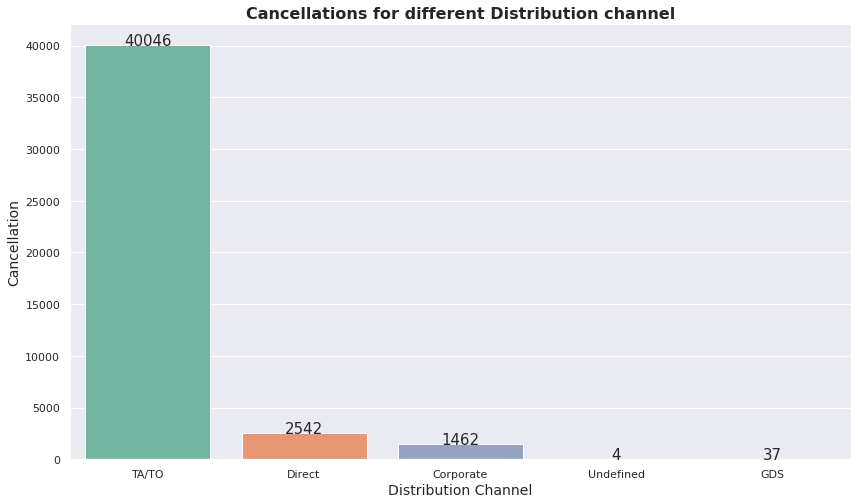

In [ ]:
# do subplot
# The graph shows cancellations for different distribution channel
sns.set(rc={'figure.figsize':(14,8)})
sns.set_palette("Set2")
ax = sns.countplot(x = 'distribution_channel', data=cancellation)
ax.set_title('Cancellations for different Distribution channel',fontsize = 16, fontweight='bold')
ax.set_xlabel('Distribution Channel',fontsize = 14)
ax.set_ylabel('Cancellation',fontsize = 14)
for rect in ax.patches:
   ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.20,rect.get_height(),horizontalalignment='center', fontsize = 15)

Here we monitored that maximum cancellations are from TA/TO followed by direct and coporate booking channel. 

### **Cancellations made due to deposits.**

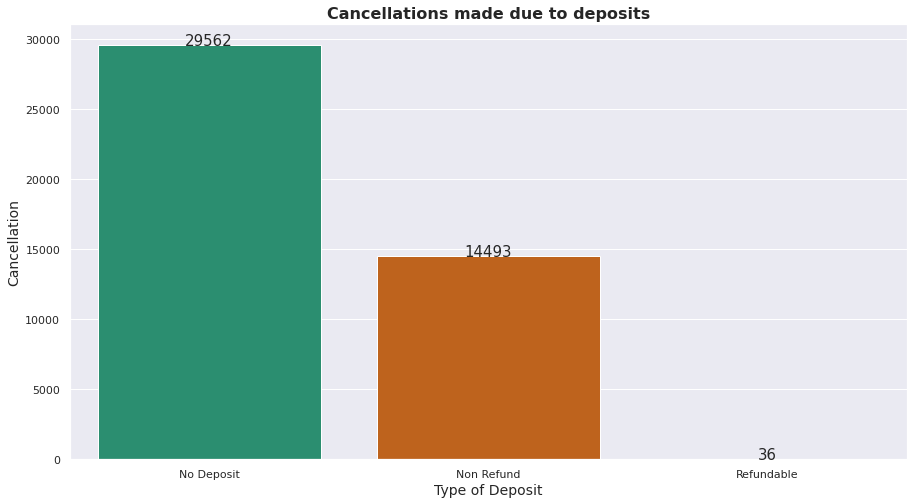

In [ ]:
# This graph shows cancellations made due to deposits.
sns.set(rc={'figure.figsize':(15,8)})
sns.set_palette("Dark2")
ax = sns.countplot(x = 'deposit_type', data=cancellation)
ax.set_title('Cancellations made due to deposits',fontsize = 16, fontweight='bold')
ax.set_xlabel('Type of Deposit',fontsize = 14)
ax.set_ylabel('Cancellation',fontsize = 14)
for rect in ax.patches:
   ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.20,rect.get_height(),horizontalalignment='center', fontsize = 15)

### Chances of cancellation is high when there is no deposits taken by hotels. So minimum deposits should be taken by hotels to decrease the rate of cancellation.

### **Cancellation based on customer type**

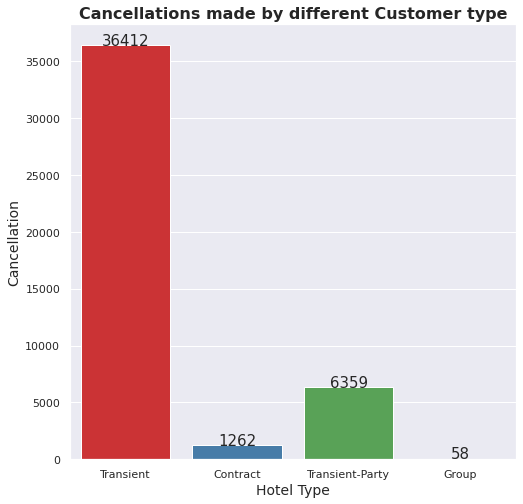

In [ ]:
# This graph shows the cancellation made by differnt customer type.
sns.set(rc={'figure.figsize':(8,8)})
sns.set_palette("Set1")
ax = sns.countplot(x='customer_type',data=cancellation)
ax.set_title('Cancellations made by different Customer type',fontsize = 16, fontweight='bold')
ax.set_xlabel('Hotel Type',fontsize = 14)
ax.set_ylabel('Cancellation',fontsize = 14)
for rect in ax.patches:
   ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.20,rect.get_height(),horizontalalignment='center', fontsize = 15)

### Transient customers cancels more often but when people book in group it leads to lesser cancellations.

##**Analysis based on Stays**

### **Total Stay of people based on ADR** 

In [ ]:
df['total_stays']=df['stays_in_week_nights']+df['stays_in_weekend_nights']

In [ ]:
df.drop(df[df['adr'] > 5000].index, inplace = True)

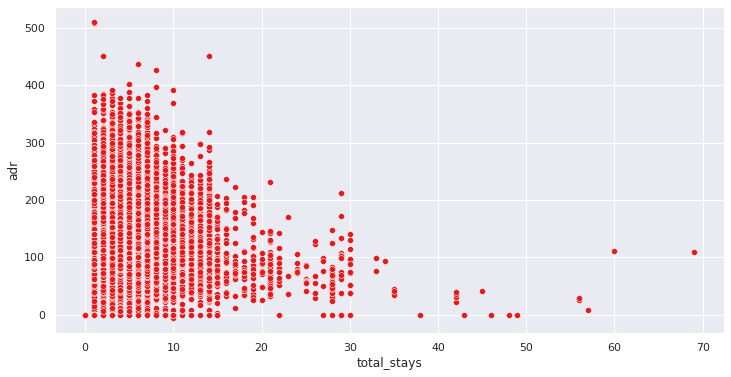

In [ ]:
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'adr', x = 'total_stays', data = df)
plt.show()

 ### The more you stay the less you pay

###From the scatter plot we can see that as length of total_stay increases the adr decreases. This means for longer stay, the better deal for customer can be finalised.

##**Analysis based on Meal**

Text(0.5, 1.0, '% share for preference of meal for customers')

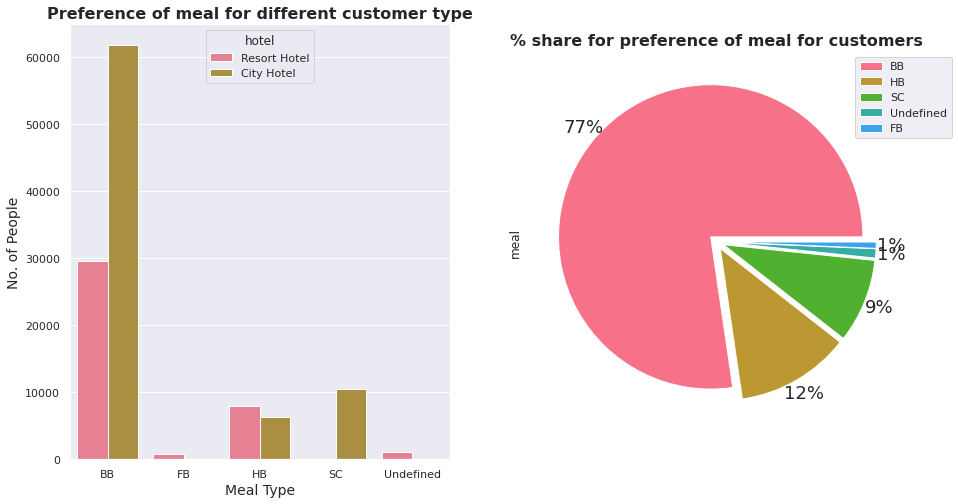

In [ ]:
# set lables
fig, axes = plt.subplots(1,2, figsize=(26, 8))

sns.set(rc={'figure.figsize':(18,8)})
sns.set_palette("husl")
graph = sns.countplot(ax=axes[0],x="meal",hue='hotel', data=new_df)
graph.set_title('Preference of meal for different customer type',fontsize = 16, fontweight='bold')
graph.set_xlabel('Meal Type',fontsize = 14)
graph.set_ylabel('No. of People',fontsize = 14)

ax=axes[1],df['meal'].value_counts().plot.pie(explode=[0.05]*5, autopct='%.0f%%', figsize=(15,8),fontsize=18,pctdistance=1.1,labeldistance=1.3,labels=None)
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=df['meal'].value_counts().index.tolist())
plt.title('% share for preference of meal for customers',fontsize = 16, fontweight='bold')

### 77% of the people prefer BB (bed & breakfast) meal type in both the hotel type.

## **ADR Studies**

### **ADR based on deposit type**

Text(0, 0.5, 'Price')

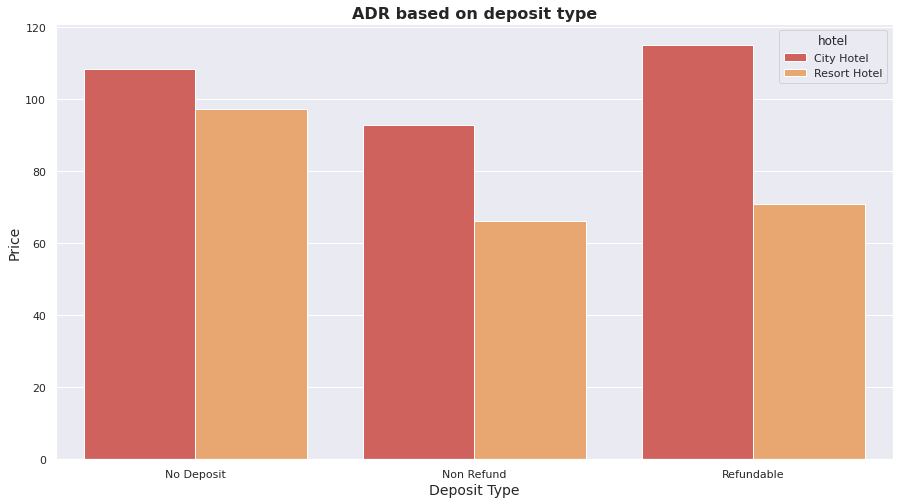

In [ ]:
# This graph shows ADR based on deposit type
df_deposit=new_df.groupby(['deposit_type','hotel'])['adr'].mean().reset_index()
sns.set(rc={'figure.figsize':(15,8)})
sns.set_palette("Spectral")
graph = sns.barplot(x="deposit_type",y='adr', hue="hotel", data=df_deposit)
graph.set_title('ADR based on deposit type',fontsize = 16, fontweight='bold')
graph.set_xlabel('Deposit Type',fontsize = 14)
graph.set_ylabel('Price',fontsize = 14)

### City hotels have refundable policy are expensive and Resort hotels having no deposit are having higher ADR.


### **Car parking spaces in hotels**

Text(0.5, 1.0, '% of car parking spaces')

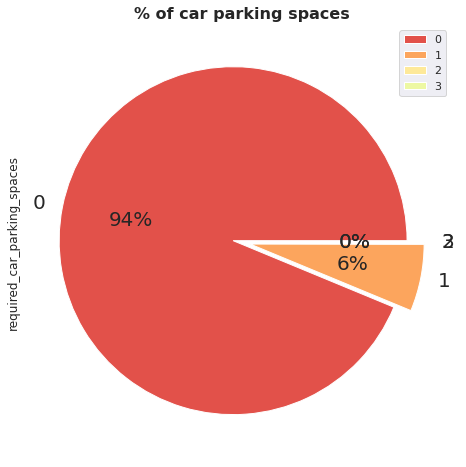

In [ ]:
# This graph shows distribution of car parking spaces in hotels.
new_df['required_car_parking_spaces'].value_counts().plot.pie(explode=[0.05]*4, autopct='%.0f%%', figsize=(10,8),fontsize=20)
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=new_df['required_car_parking_spaces'].value_counts().index.tolist())
plt.title('% of car parking spaces',fontsize = 16, fontweight='bold')

### About 94% of people dont shows their concern in car parking space while hotel booking.Most of the customer don't require the car parking spaces

# **Analysis based on Country**

In [ ]:
import pandas as pd
import plotly.express as px
fig = px.choropleth(df, locations="country",
                    color="adr",
                    animation_frame="hotel",
                    title = "Fare of hotels in Different Country",
                    color_continuous_scale=px.colors.sequential.PuRd)
 
 
fig["layout"].pop("updatemenus")
fig.show()
# Top 10 countries with highest revenue and write its attributes for max one

Output hidden; open in https://colab.research.google.com to view.

####**Top most countries with maximum booking and revenue.**

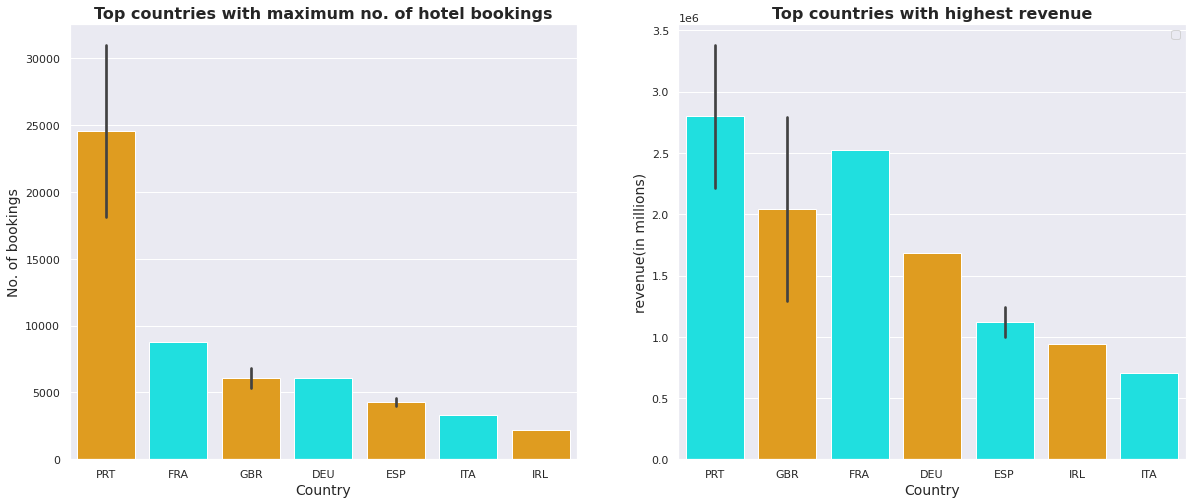

In [ ]:
# set lables
fig, axes = plt.subplots(1,2, figsize=(20, 8))

# set plot size and plot the line
sns.set(rc={'figure.figsize':(16,8)})
sns.set_palette("Set2")
ax = sns.barplot(ax=axes[0],x='country',y='count',data=top10_country, palette=['orange', 'cyan'])
ax.set_title('Top countries with maximum no. of hotel bookings',fontsize = 16, fontweight='bold')
ax.set_xlabel('Country',fontsize = 14)
ax.set_ylabel('No. of bookings',fontsize = 14)
plt.legend(loc='upper right') 

# Finding Top 10 countries with highest revenue.
country_adr = actual_guests.groupby(['country','hotel'])['revenue'].sum().astype(int).reset_index().sort_values(by='revenue',ascending=False).head(10)
sns.set(rc={'figure.figsize':(16,8)})
sns.set_palette("Set2")
ax = sns.barplot(ax=axes[1],x="country",y='revenue', data=country_adr, palette=['cyan', 'orange'])
ax.set_title('Top countries with highest revenue',fontsize = 16, fontweight='bold')
ax.set_xlabel('Country',fontsize = 14)
ax.set_ylabel('revenue(in millions)',fontsize = 14)
plt.legend(loc='upper right')

Text(0, 0.5, 'Price')

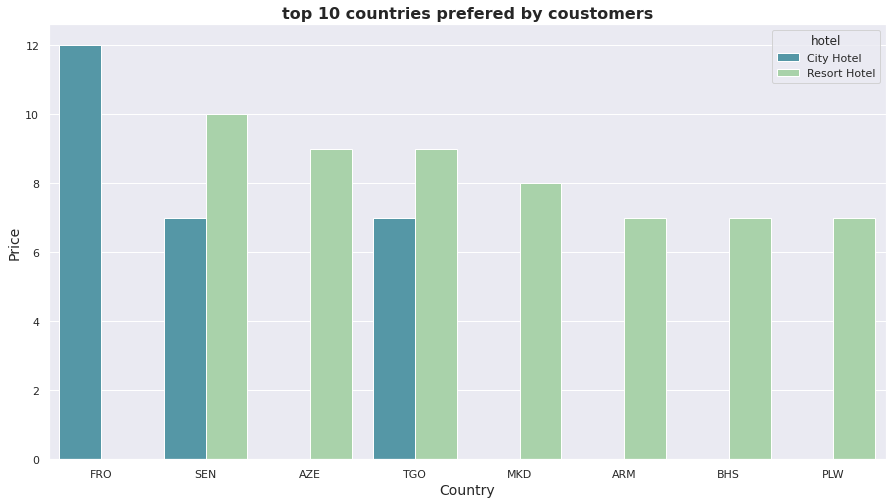

In [65]:
# Top 10 countries customers prefer to stay.
preffered_stay = new_df.groupby(['country','hotel'])['total_stays'].mean().astype(int).reset_index().sort_values(by='total_stays',ascending=False).head(10)
sns.set(rc={'figure.figsize':(15,8)})
sns.set_palette("Spectral_r")
graph = sns.barplot(x="country",y='total_stays', hue="hotel", data=preffered_stay,)
graph.set_title('top 10 countries prefered by coustomers',fontsize = 16, fontweight='bold')
graph.set_xlabel('Country',fontsize = 14)
graph.set_ylabel('Price',fontsize = 14)

## **Analysis based on Repeated Guest**

Text(0.5, 1.0, '% of repeated customers in Hotel')

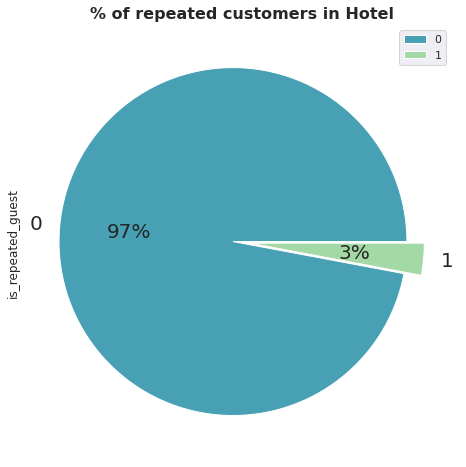

In [ ]:
new_df['is_repeated_guest'].value_counts().plot.pie(explode=[0.05]*2, autopct='%.0f%%', figsize=(10,8),fontsize=20)
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=new_df['is_repeated_guest'].value_counts().index.tolist())
plt.title('% of repeated customers in Hotel',fontsize = 16, fontweight='bold')

### Mostly the guests are new customers and very small share for repeated customers

##**Analysis based on Special Request**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'Count')

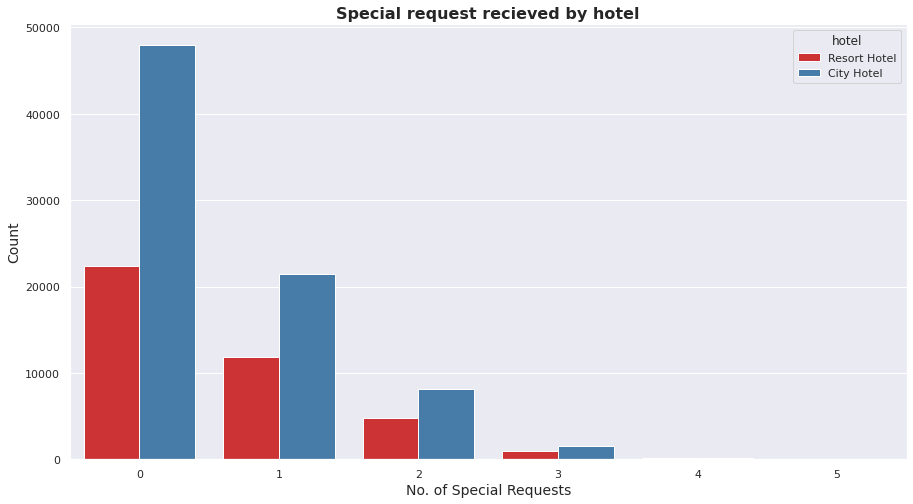

In [64]:
sns.set(rc={'figure.figsize':(15,8)})
sns.set_palette("Set1")
graph = sns.countplot(df["total_of_special_requests"], hue=df["hotel"], data=df)
graph.set_title('Special request recieved by hotel',fontsize = 16, fontweight='bold')
graph.set_xlabel('No. of Special Requests',fontsize = 14)
graph.set_ylabel('Count',fontsize = 14)

### City hotels receives more special requests than Resort hotels. Most of the customers don't have special requests.

## **Analysis based on reservation status**

Text(0.5, 1.0, 'Reservation status')

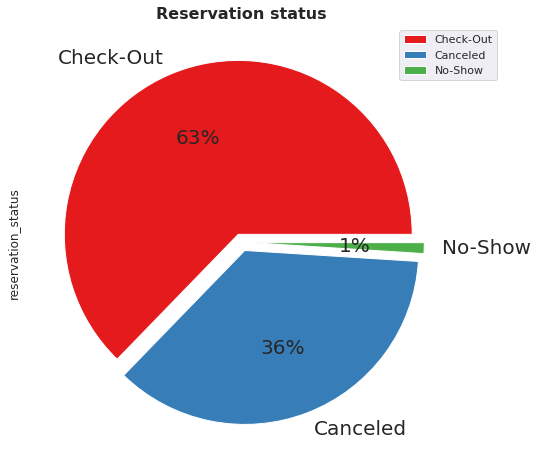

In [ ]:
new_df['reservation_status'].value_counts().plot.pie(explode=[0.05]*3, autopct='%.0f%%', figsize=(10,8),fontsize=20)
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=new_df['reservation_status'].value_counts().index.tolist())
plt.title('Reservation status',fontsize = 16, fontweight='bold')

### Out of total no of reservations 63% actually show up, 36% got canceled, and only 1% reservation got No show.